## 22.2 Load the IMDB Dataset with Keras

In [6]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(test_split=0)

In [7]:
# summarize size
print("Training data: ")
print(X_train.shape)
print(y_train.shape)

Training data: 
(25000,)
(25000,)


In [8]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y_train))

Classes: 
[0 1]


In [11]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X_train))))

Number of words: 
102099


Review length: 
Mean 285.84 words (212.622320)


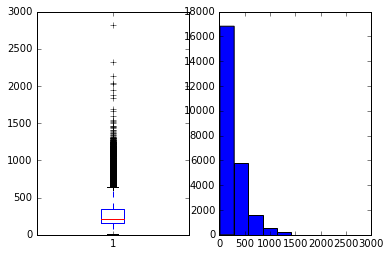

In [12]:
# Summarize review length
print("Review length: ")
result = map(len, X_train)
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length as a boxplot and histogram
%matplotlib inline
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

## 22.3 Word Embeddings

In [13]:
# load the dataset
# only interested in the first 5,000 most used words
# 32D Vector
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=5000, test_split=0.33)

In [15]:
# Max review of 500 words
# Truncate longer reviews
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

## 22.4 Simple Multilayer Perceptron Model

In [17]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [18]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, test_split=test_split)

In [19]:
# truncating longer reviews and zero-padding shorter reviews
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [21]:
# create the model
model = Sequential()
# Converts array of length 500 with 5,000 unique integers
# to 32 * 500 matrix
model.add(Embedding(top_words, 32, input_length=max_words))
## Explain the number of param for Embedding
## 5,000 words * 32 Dimension = 160,000 Parameters
## Each word is placed on 32 Dimensions. 'word' * 32 parameters = 32D Vector
## Repeat above process for the length of review = 500
## 32D Vector * 500 = 32 * 500 Matrix
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       160000      embedding_input_1[0][0]          
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 16000)         0           embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 250)           4000250     flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             251         dense_1[0][0]                    
Total params: 4160501
_____________________________________________________________________

In [25]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 16750 samples, validate on 8250 samples
Epoch 1/2
16750/16750 [==============================] - 24s - loss: 0.5616 - acc: 0.6785 - val_loss: 0.3420 - val_acc: 0.8573
Epoch 2/2
16750/16750 [==============================] - 22s - loss: 0.2027 - acc: 0.9219 - val_loss: 0.3299 - val_acc: 0.8627
Accuracy: 86.27%


## 22.5 One-Dimensional Convolutional Neural Network

In [26]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [27]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words,
    test_split=test_split)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [45]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
## Number of Parameters 3104
## 32 * 500 Matrix, Filter Length = 3, One Filter is 32 * 3 = 96 Parameters
## 96 Parameters * 32 Filters = 3072
## 3072 Parameters + 32 Bias (for each filter) = 3104
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_5 (Embedding)          (None, 500, 32)       160000      embedding_input_5[0][0]          
____________________________________________________________________________________________________
convolution1d_4 (Convolution1D)  (None, 500, 32)       3104        embedding_5[0][0]                
____________________________________________________________________________________________________
maxpooling1d_4 (MaxPooling1D)    (None, 250, 32)       0           convolution1d_4[0][0]            
____________________________________________________________________________________________________
flatten_5 (Flatten)              (None, 8000)          0           maxpooling1d_4[0][0]             
___________________________________________________________________________________________

In [46]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 16750 samples, validate on 8250 samples
Epoch 1/2
16750/16750 [==============================] - 49s - loss: 0.5586 - acc: 0.6631 - val_loss: 0.3437 - val_acc: 0.8508
Epoch 2/2
16750/16750 [==============================] - 46s - loss: 0.2802 - acc: 0.8866 - val_loss: 0.2986 - val_acc: 0.8749
Accuracy: 87.49%


In [42]:
3880

3880

In [44]:
96 * 32

3072

In [47]:
9261 /  60

154